In [1]:
import numpy as np
import pandas as pd

import random
import scipy.stats as sts

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("insurance.csv")
print(df.shape)
df.head(3)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

2. Построить гистограммы для числовых показателей.

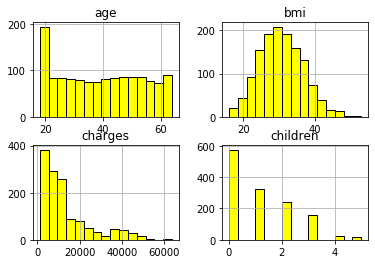

In [5]:
df.hist(color='yellow', edgecolor='black', bins=15)
plt.show()

3. Найти меры центральной тенденции и меры разброса для индекса массы 
тела (bmi) и расходов (charges). Отобразить результаты в виде текста и 
на гистограммах (3 вертикальные линии). Добавить легенду на графики. 

Меры центральной тенденции:
- среднее;
- медиана;
- мода.

In [6]:
def base_statistics(feature, name):
    mean = np.mean(feature)
    median = np.median(feature)
    mode = sts.mode(feature)
    
    print(f'\nМеры центральной тенденции для {name}:\n')
    print('Среднее: ', mean)
    print('Медиана: ', median)
    print('Мода и количество ее вхождений: ', mode)
    
    maximum = feature.max()
    minimum = feature.min()
    scope = maximum - minimum
    std = feature.std()
    
    print(f'\nМеры разброса для {name}:\n')
    print('Размах: ', scope)
    print('Стандартное отклонение: ', std)
    
    iqr = sts.iqr(feature, interpolation='midpoint')
    print('Межквартильный размах (IQR): ', iqr)
    
    statistics = {'mean': mean, 'median': median, 'mode': mode,
                  'scope': scope, 'std': std, 'iqr': iqr}
    
    return statistics

In [7]:
stats_bmi = base_statistics(df.bmi, 'bmi')
stats_charges = base_statistics(df.charges, 'charges')


Меры центральной тенденции для bmi:

Среднее:  30.663396860986538
Медиана:  30.4
Мода и количество ее вхождений:  ModeResult(mode=array([32.3]), count=array([13]))

Меры разброса для bmi:

Размах:  37.17
Стандартное отклонение:  6.098186911679017
Межквартильный размах (IQR):  8.384999999999998

Меры центральной тенденции для charges:

Среднее:  13270.422265141257
Медиана:  9382.033
Мода и количество ее вхождений:  ModeResult(mode=array([1639.5631]), count=array([2]))

Меры разброса для charges:

Размах:  62648.554110000005
Стандартное отклонение:  12110.011236693994
Межквартильный размах (IQR):  11879.80148


**Отображение мер центральной тенденции**

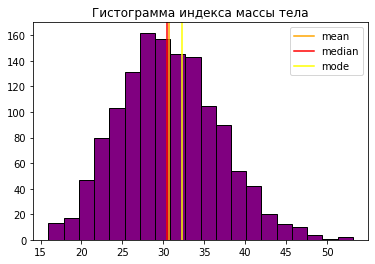

In [8]:
plt.hist(df.bmi, edgecolor='black', color='purple', bins=20)
plt.title('Гистограмма индекса массы тела')
plt.axvline(stats_bmi['mean'], color='orange', label='mean')
plt.axvline(stats_bmi['median'], color='red', label='median')
plt.axvline(float(stats_bmi['mode'][0]), color='yellow', label='mode')
plt.legend()
plt.show()

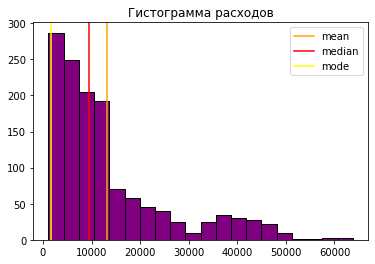

In [9]:
plt.hist(df.charges, edgecolor='black', color='purple', bins=20)
plt.title('Гистограмма расходов')
plt.axvline(stats_charges['mean'], color='orange', label='mean')
plt.axvline(stats_charges['median'], color='red', label='median')
plt.axvline(float(stats_charges['mode'][0]), color='yellow', label='mode')
plt.legend()
plt.show()

**Отображение мер разброса**

In [19]:
stats_bmi_go = pd.DataFrame.from_dict(stats_bmi).iloc[0].transpose()
stats_bmi_go = pd.DataFrame(stats_bmi_go)
stats_bmi_go.rename(columns={0: 'bmi'}, inplace=True)

stats_charges_go = pd.DataFrame.from_dict(stats_charges).iloc[0].transpose()
stats_charges_go = pd.DataFrame(stats_charges_go)
stats_charges_go.rename(columns={0: 'charges'}, inplace=True)

result_stat = pd.concat([stats_bmi_go, stats_charges_go], axis=1)
result_stat = result_stat.iloc[3:]
result_stat.reset_index(inplace=True)
result_stat.rename(columns={'index': 'Параметр'}, inplace=True)
result_stat.bmi = result_stat.bmi.apply(lambda x: round(x, 2)) 
result_stat.charges = result_stat.charges.apply(lambda x: round(x, 2)) 
result_stat

In [ ]:
fig = go.Figure(px.bar(result_stat, 'Параметр', 'bmi', text = 'bmi', color='Параметр'))
fig.update_traces(textfont_size = 14, textangle = 0, textposition = 'outside', marker = dict(line = dict(color = 'black', width = 2)))
fig.update_layout(
    title  = 'Меры разброса', title_font_size = 16, title_x = 0.5,
    height = 500,
    width = 500
)
fig.show()

In [ ]:
fig = go.Figure(px.bar(result_stat, 'Параметр', 'charges', text = 'charges', color = 'Параметр'))
fig.update_traces(textfont_size = 14, textangle = 0, textposition = 'outside', marker = dict(line = dict(color = 'black', width = 2)))
fig.update_layout(
    title  = 'Меры разброса', title_font_size = 16, title_x = 0.5,
    height = 500,
    width = 500
)
fig.show()

4. Построить box-plot для числовых показателей. Названия графиков 
должны соответствовать названиям признаков.

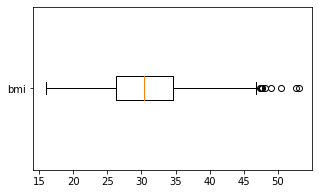

In [35]:
plt.figure(figsize=(5, 3))
plt.boxplot(df.bmi,
            labels=['bmi'], vert=False)
plt.show()

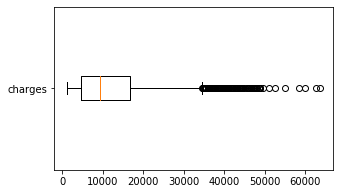

In [21]:
plt.figure(figsize=(5, 3))
plt.boxplot(df.charges,
            labels=['charges'], vert=False)
plt.show()

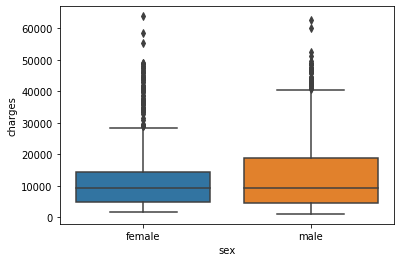

In [22]:
sns.boxplot(data=df, x=df['sex'], y=df['charges'])
plt.show()

5. Используя признак charges или imb, проверить, выполняется ли 
центральная предельная теорема. Использовать различные длины 
выборок n. Количество выборок = 300. Вывести результат в виде 
гистограмм. Найти стандартное отклонение и среднее для полученных 
распределений.

In [23]:
def sample_for_CLT(feature, sample_size):
    sample_means = []
    
    for i in range(301):
        sample = feature.sample(sample_size)
        sample_means.append(np.mean(sample))
        
    return sample_means

In [24]:
values_mean = {50: sample_for_CLT(df.charges, 50),
               150: sample_for_CLT(df.charges, 100),
               300: sample_for_CLT(df.charges, 300)}
x = np.linspace(-4, 4, 100)

In [25]:
print('Дисперсия генеральной совокупности:', stats_charges['std'])
print('Среднее генеральной совокупности:', stats_charges['mean'])

for i in [50, 150, 300]:
    print(f'\nВыборка для расходов размера {i}')
    print(f'Стандартное отклонение: {np.std(values_mean[i])}')
    print(f'Среднее: {np.mean(values_mean[i])}')

Дисперсия генеральной совокупности: 12110.011236693994
Среднее генеральной совокупности: 13270.422265141257

Выборка для расходов размера 50
Стандартное отклонение: 1729.0323939134707
Среднее: 13029.063935139402

Выборка для расходов размера 150
Стандартное отклонение: 1127.842936898419
Среднее: 13156.70332334

Выборка для расходов размера 300
Стандартное отклонение: 655.7219909495799
Среднее: 13312.744403945611


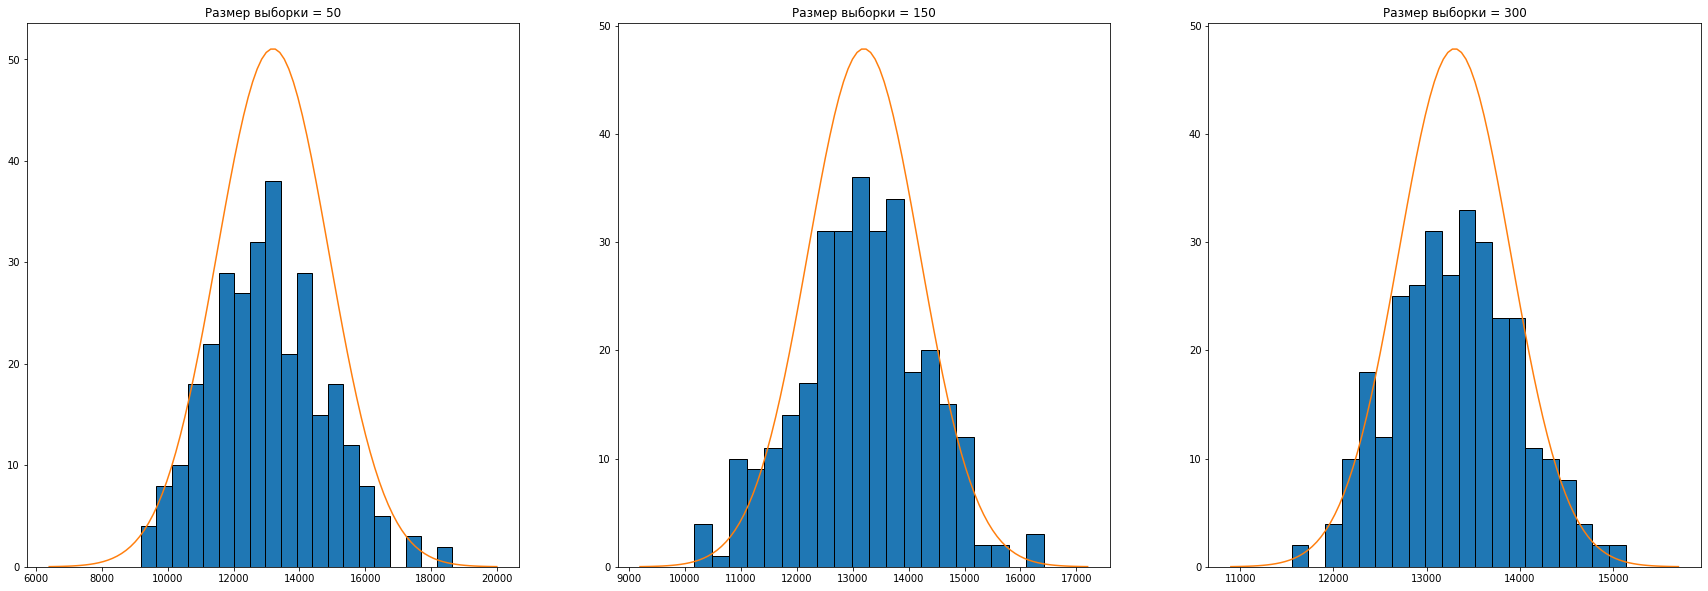

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(30,10))
ax[0].hist(values_mean[50], bins=20, edgecolor='black')
ax[0].plot(x*1700+13200,  sts.norm.pdf(x) * 128)
ax[0].set_title('Размер выборки = 50')

ax[1].hist(values_mean[150], bins=20, edgecolor='black')
ax[1].set_title('Размер выборки = 150')
ax[1].plot(x*1000+13200, sts.norm.pdf(x) * 120)

ax[2].hist(values_mean[300], bins=20, edgecolor='black')
ax[2].set_title('Размер выборки = 300')
ax[2].plot(x*600+13300, sts.norm.pdf(x) * 120)

plt.show()

6. Построить 95% и 99% доверительный интервал для среднего значения 
расходов и среднего значения индекса массы тела.

In [27]:
import math
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean, se = np.mean(data), np.std(data) / math.sqrt(n)
    h = 1.96 * se if confidence == 0.95 else 2.58 * se if confidence == 0.99 else 1.65 * se
    return round(mean-h, 3), round(mean+h, 3)

In [28]:
print('Доверительный интервал среднего значения charges (95%): ', confidence_interval(df.charges))
print('Доверительный интервал среднего значения bmi (95%): ', confidence_interval(df.bmi))
print('\nДоверительный интервал среднего значения charges (99%): ', confidence_interval(df.charges, 0.99))
print('Доверительный интервал среднего значения bmi (99%): ', confidence_interval(df.bmi, 0.99))

Доверительный интервал среднего значения charges (95%):  (12621.773, 13919.072)
Доверительный интервал среднего значения bmi (95%):  (30.337, 30.99)

Доверительный интервал среднего значения charges (99%):  (12416.587, 14124.257)
Доверительный интервал среднего значения bmi (99%):  (30.233, 31.093)


7. Проверить распределения следующих признаков на нормальность: 
индекс массы тела, расходы. Сформулировать нулевую и 
альтернативную гипотезы. Для каждого признака использовать KS-тест
и q-q plot.

In [29]:
normal_dist = np.random.normal(loc=0.0, scale=1.0, size=df.shape[0])
# plt.hist(normal_dist, bins=40)
# plt.show()

In [30]:
normalized_bmi = (df.bmi - df.bmi.min())/ (df.bmi.max() - df.bmi.min())

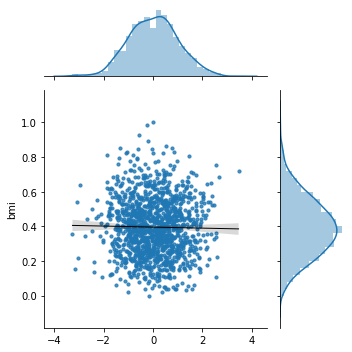

In [31]:
sns.jointplot(x=normal_dist, y=normalized_bmi, kind='reg', truncate=True,
             height=5, ratio=3, line_kws={'lw': 1, 'color': 'black'},
             scatter_kws={'s': 10})
plt.show()

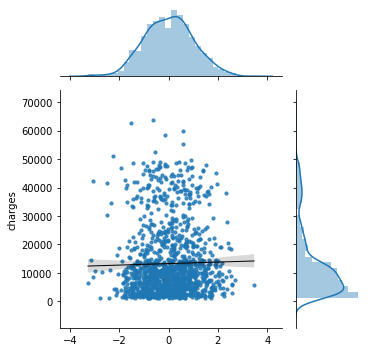

In [32]:
sns.jointplot(x=normal_dist, y=df.charges, kind='reg', truncate=True,
              height=5, ratio=3, line_kws={'lw': 1, 'color': 'black'},
              scatter_kws={'s': 10})
plt.show()

p-значение для bmi: 0.316
p-значение для charges: 4.39305730768502e-42


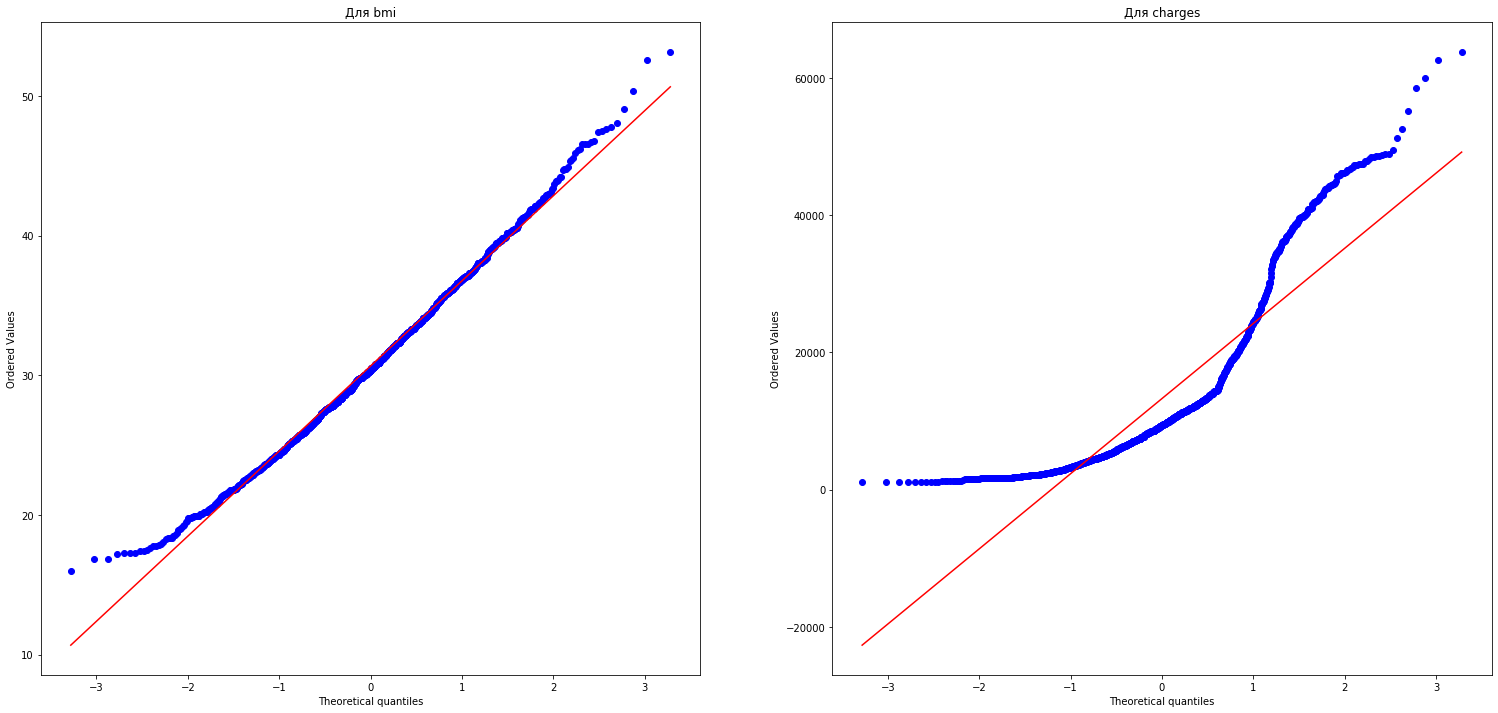

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(26,12))
sts.probplot(df.bmi, plot=ax[0])
ax[0].set_title('Для bmi')
sts.probplot(df.charges, plot=ax[1])
ax[1].set_title('Для charges')
bmi_ks_test = sts.kstest(sts.zscore(df.bmi), 'norm')
charges_ks_test = sts.kstest(sts.zscore(df.charges), 'norm')

print('p-значение для bmi:', round(bmi_ks_test[1], 3))
print('p-значение для charges:', charges_ks_test[1])